In [2]:
from IPython.display import Image
%matplotlib inline

In [3]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)


#df = pd.read_csv('wdbc.data', header=None)
df.head()# (569,30)
#M:惡性腫瘤212
#B:良性腫瘤357


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
from sklearn.preprocessing import LabelEncoder

#特徵從[2]~,共30
X = df.loc[:, 2:]
#標簽[1]
y = df.loc[:, 1]
#['B', 'M']=> [良，惡]
le = LabelEncoder()
y = le.fit_transform(y)
print(le.classes_) #原始內容
print(y)

['B' 'M']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)
# 訓練 / 測試＝455(M(1)170/B(0)285)/114(M(1)42/B(0)72

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.956


# K-fold摺疊法

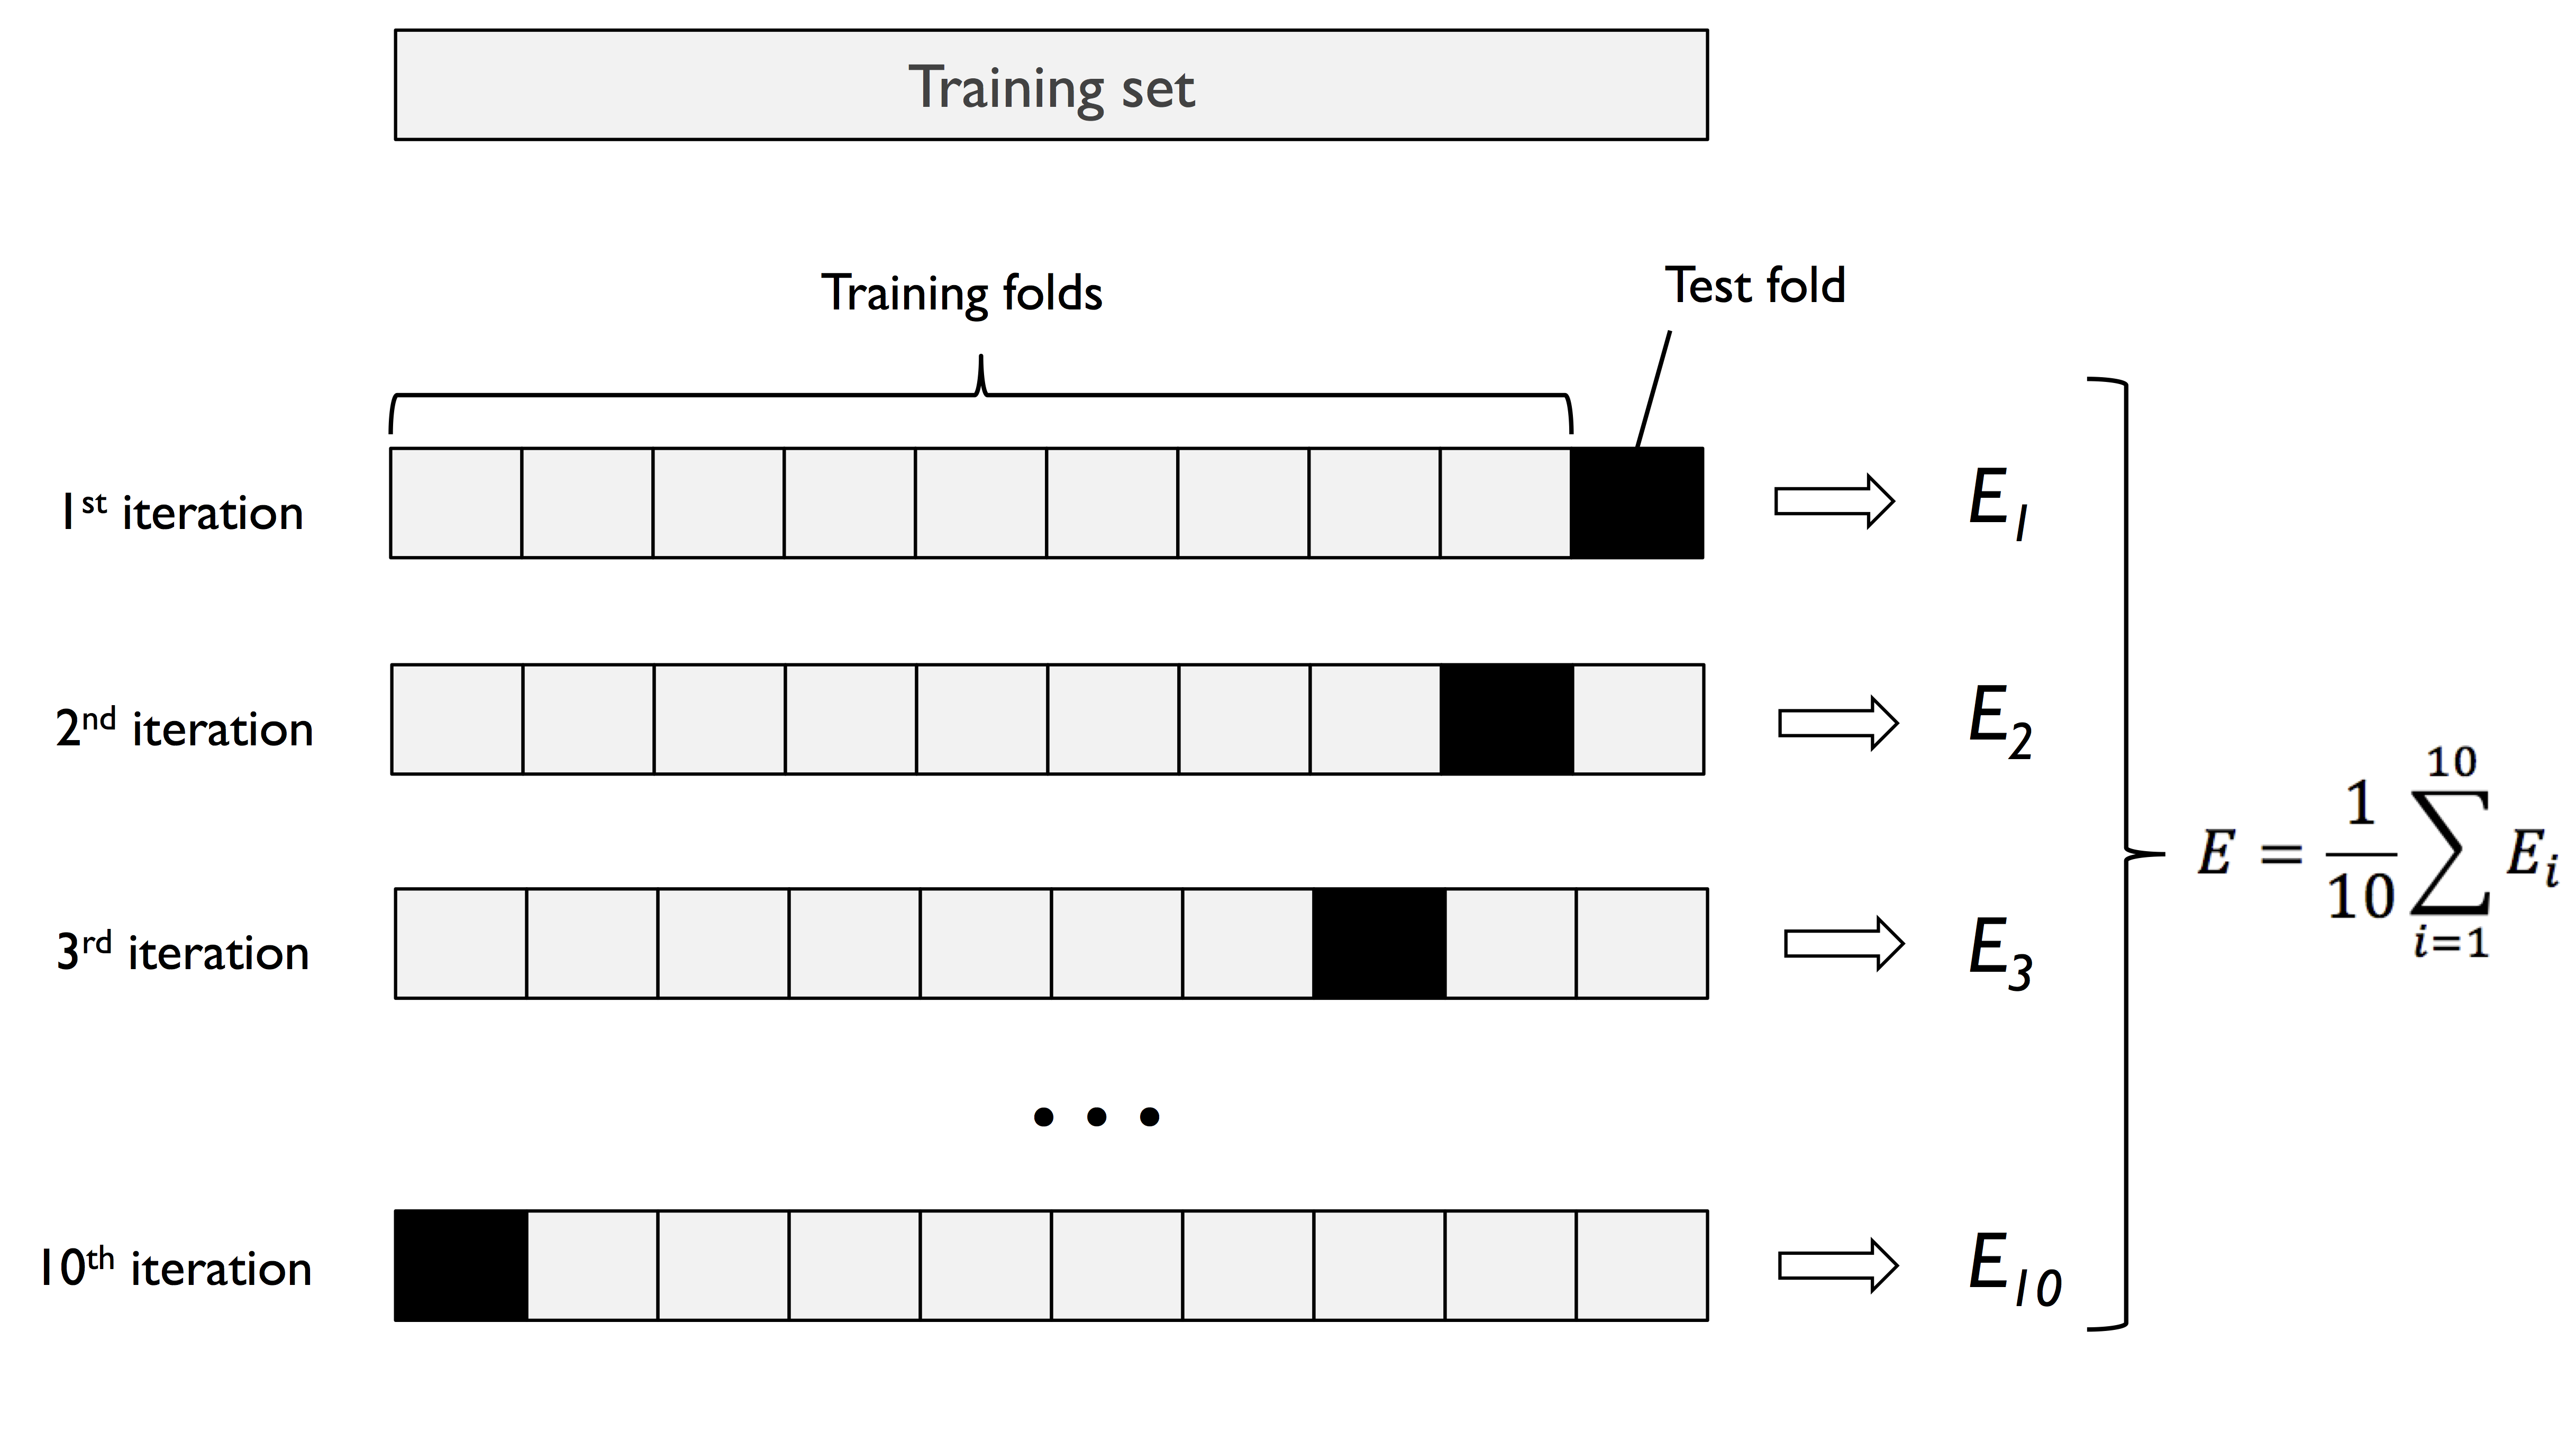

In [7]:
Image(filename='images/06_03.png', width=500) 

## cross_val_score

In [9]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV accuracy: 0.950 +/- 0.014


# Learning Curve

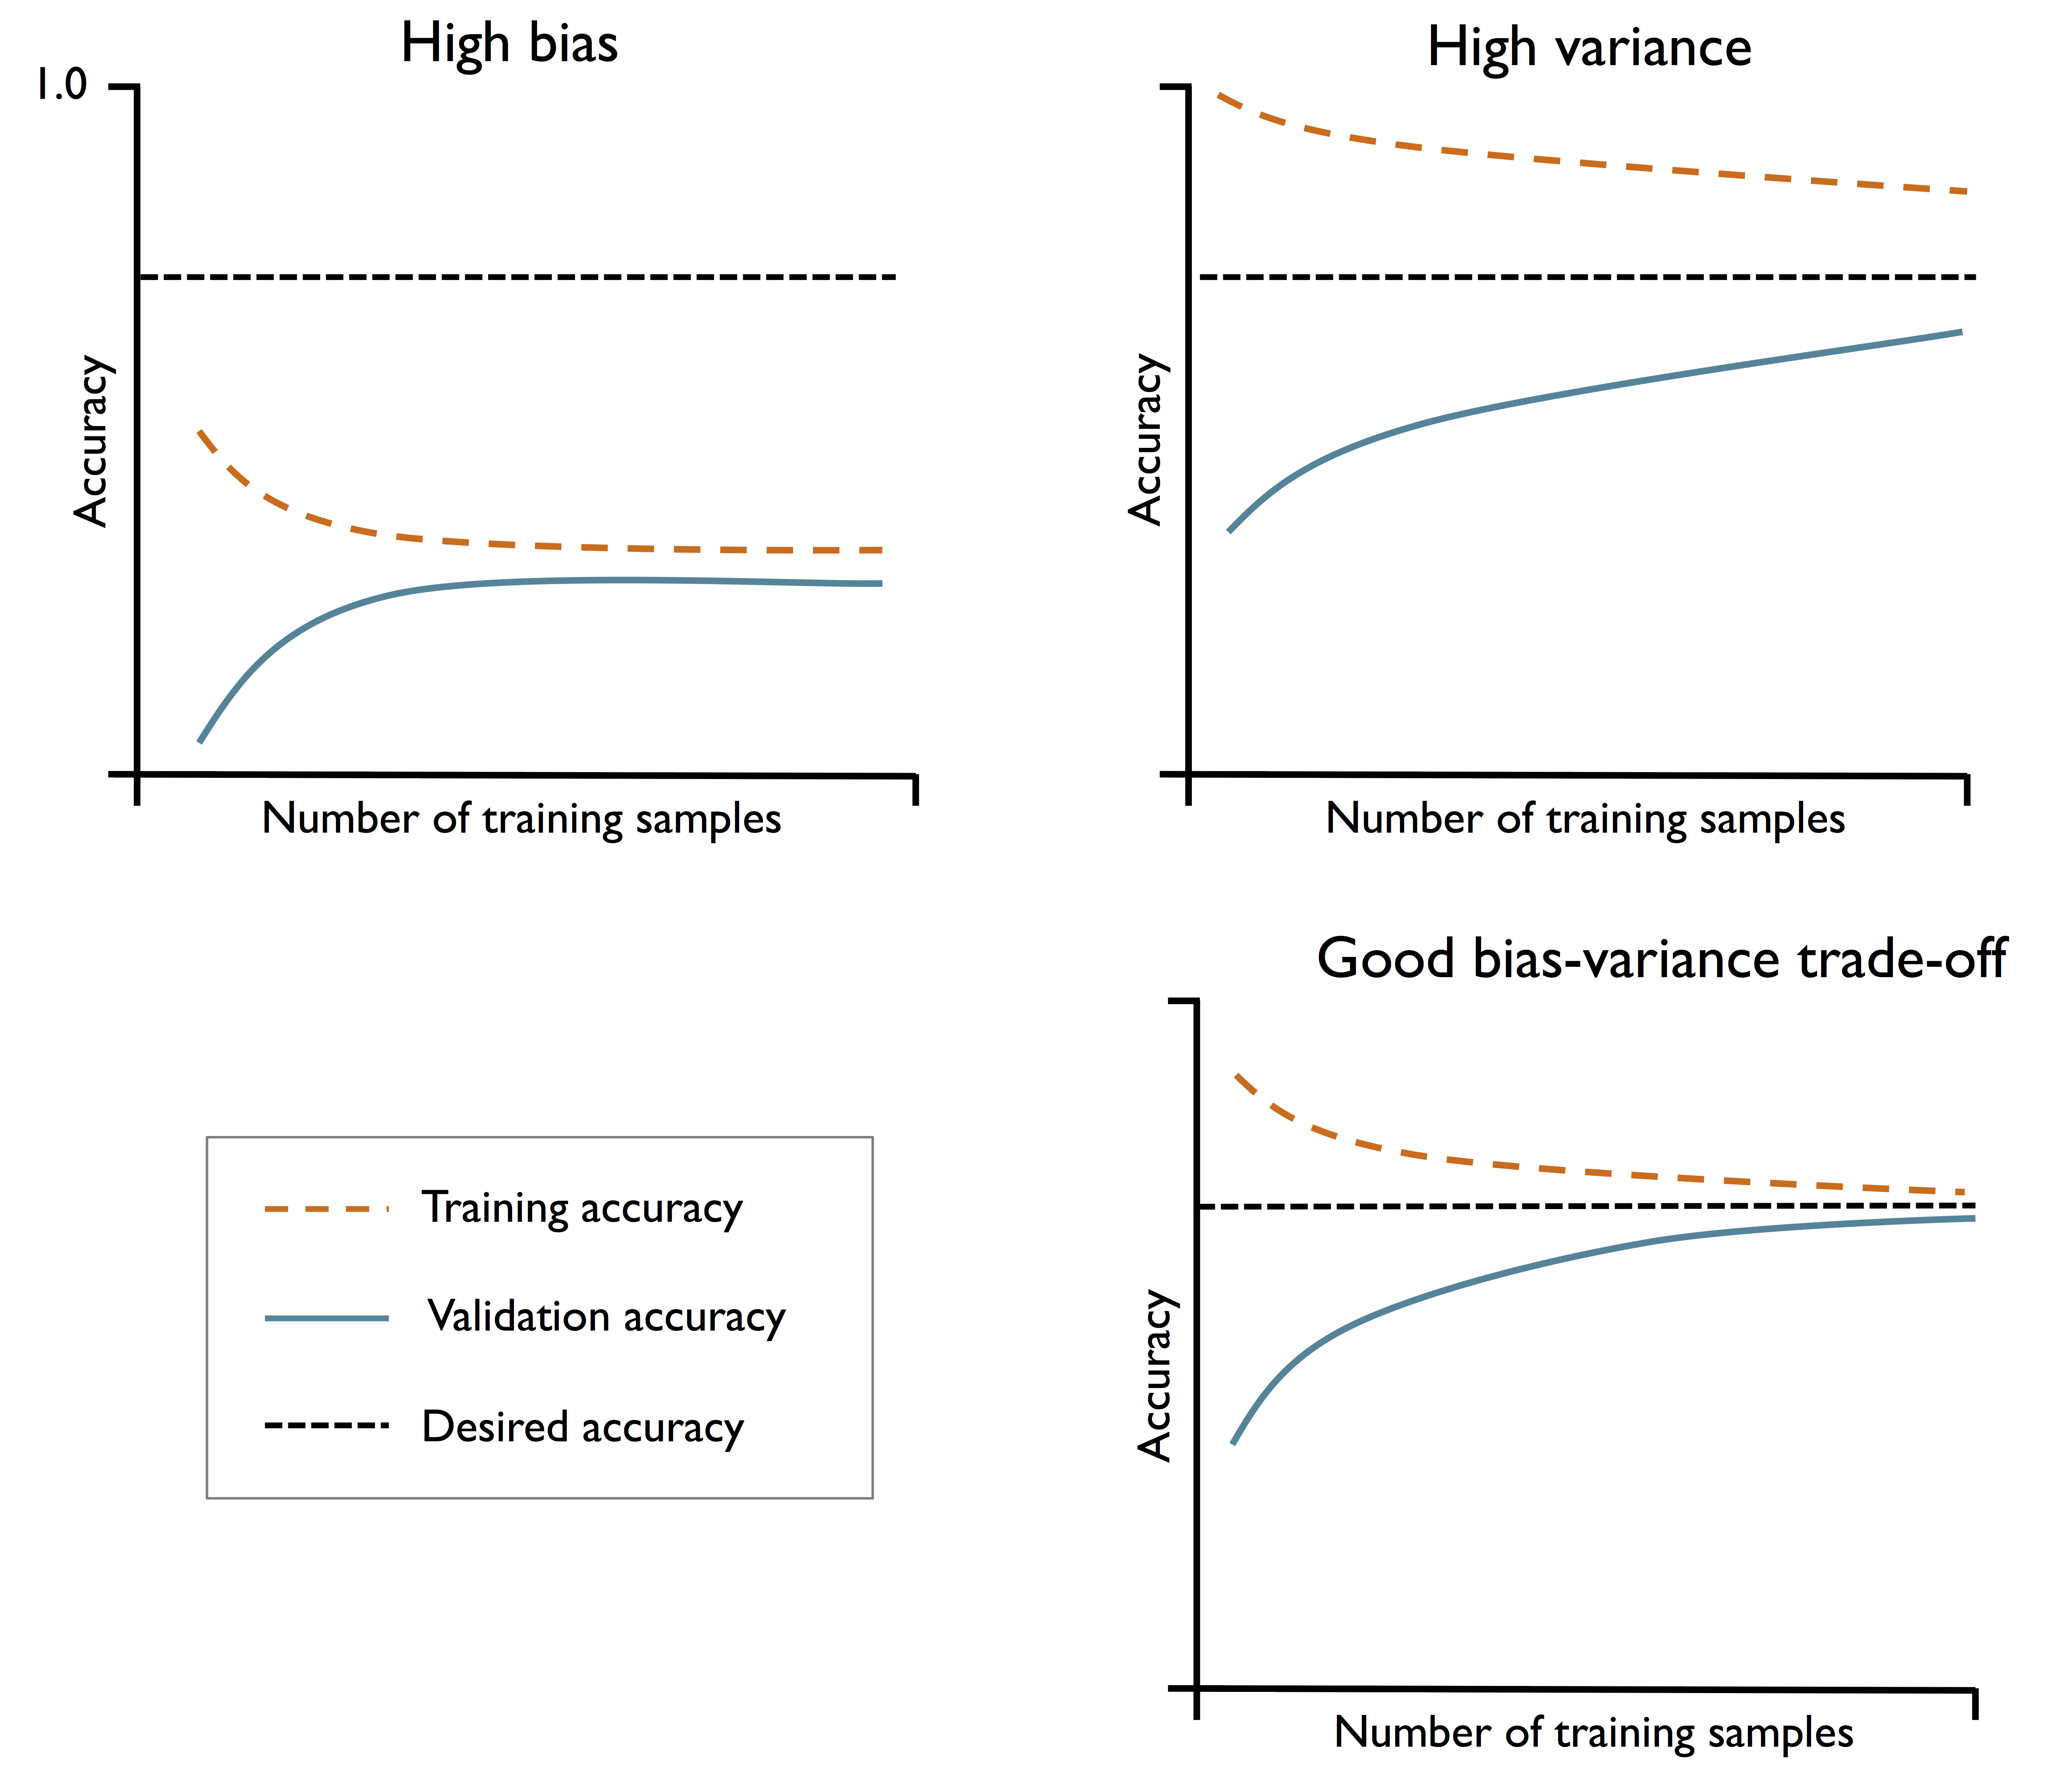

In [ ]:
Image(filename='images/06_04.png', width=600) 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', 
                                           random_state=1))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               #將455劃分10刻度，依次取出訓練(10%,20%,30%...)
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               #取出的部分再切10等分
                               cv=10,
                               n_jobs=1)

In [ ]:
print(train_sizes)
print(train_scores)
print(test_scores)

[ 40  81 122 163 204 245 286 327 368 409]
[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         0.99180328 0.99180328 0.99180328 0.99180328
  0.99180328 0.99180328 0.99180328 0.99180328]
 [0.99386503 0.99386503 0.99386503 0.99386503 1.         1.
  1.         1.         1.         1.        ]
 [0.98529412 0.98529412 0.98529412 0.99019608 0.99509804 0.99509804
  0.99509804 0.99509804 0.99509804 0.99509804]
 [0.97959184 0.98367347 0.97959184 0.9877551  0.9877551  0.9877551
  0.9877551  0.9877551  0.9877551  0.9877551 ]
 [0.97902098 0.98601399 0.98251748 0.98951049 0.98951049 0.98951049
  0.98601399 0.98601399 0.98601399 0.98601399]
 [0.98470948 0.98470948 0.98776758 0.98470948 0.99082569 0.99082569
  0.98776758 0.98776758 0.98776758 0.98776758]
 [0.98641304 0.98641304 0.98913043 0.98913043 0.99184783 0.9891

[ 12  24  36  48  60  72  84  96 108 120]
[[       nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [0.98809524 0.98809524 1.         0.98809524 0.98809524]
 [0.98958333 0.97916667 0.97916667 1.         0.97916667]
 [0.98148148 0.98148148 0.98148148 0.99074074 0.98148148]
 [0.975      0.975      0.99166667 0.98333333 0.98333333]]
[[       nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]
 [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]
 [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]
 [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]
 [0.93333333 0.83333333 0.9  

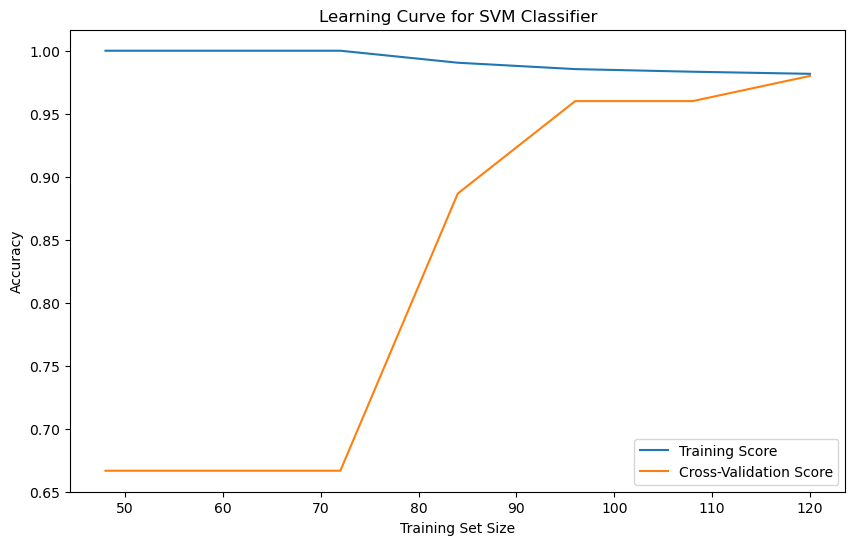

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

# 創建一個虛擬的鳶尾花數據集
iris = load_iris()
X, y = iris.data, iris.target

# 定義不同大小的訓練數據集比例
train_sizes = np.linspace(0.1, 1.0, 10)

# 創建支持向量機模型
svm = SVC(kernel='linear')

# 使用learning_curve函數計算學習曲線
train_sizes, train_scores, test_scores = learning_curve(
    svm, X, y, train_sizes=train_sizes, cv=5)

print(train_sizes)
print(train_scores)
print(test_scores)

# 計算每個訓練集大小的平均性能
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# 繪製學習曲線
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve for SVM Classifier')
plt.show()

# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},  #8次
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]     #64次
                                            #8+64=共72次
gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,                    #切10份
                  n_jobs=-1)
                                            #共72*10次
                                            
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


### 沒使用K-fold

In [ ]:
clf = gs.best_estimator_

clf.fit(X_train, y_train)
# Note that the line above is not necessary, because
# the best_estimator_ will already be refit to the complete
# training set because of the refit=True setting in GridSearchCV
# (refit=True by default). Thanks to a reader, German Martinez,
# for pointing it out.

print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.974
